In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf

In [3]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [4]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(np.float32) / 255.

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(np.float32) / 255.

y_train = np_utils.to_categorical(y_train)

y_test = np_utils.to_categorical(y_test)

In [9]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [10]:
os.getcwd()

'C:\\Users\\mo223\\Desktop\\Folder\\공부 폴더\\Deep Learning For Everyone'

In [11]:
# 모델 최적화 설정
MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only= True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [12]:
# 모델의 실행
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30, batch_size = 200,
                   verbose = 0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05266, saving model to ./model\01-0.0527.hdf5

Epoch 00002: val_loss improved from 0.05266 to 0.03863, saving model to ./model\02-0.0386.hdf5

Epoch 00003: val_loss improved from 0.03863 to 0.03541, saving model to ./model\03-0.0354.hdf5

Epoch 00004: val_loss improved from 0.03541 to 0.03354, saving model to ./model\04-0.0335.hdf5

Epoch 00005: val_loss improved from 0.03354 to 0.03232, saving model to ./model\05-0.0323.hdf5

Epoch 00006: val_loss improved from 0.03232 to 0.03024, saving model to ./model\06-0.0302.hdf5

Epoch 00007: val_loss improved from 0.03024 to 0.02630, saving model to ./model\07-0.0263.hdf5

Epoch 00008: val_loss did not improve from 0.02630

Epoch 00009: val_loss did not improve from 0.02630

Epoch 00010: val_loss did not improve from 0.02630

Epoch 00011: val_loss did not improve from 0.02630

Epoch 00012: val_loss did not improve from 0.02630

Epoch 00013: val_loss did not improve from 0.02630

Epoch 00014: val_lo

In [13]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.0281 - accuracy: 0.9925

 Test Accuracy: 0.9925


In [14]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

In [15]:
# 학습셋의 오차
y_loss = history.history['loss']

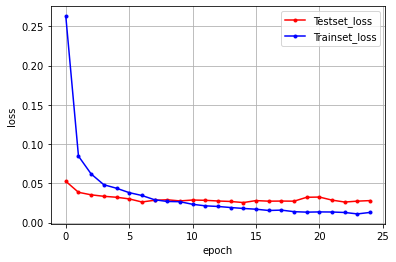

In [18]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = ".", c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()